<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/supervisedclassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://blog.logrocket.com/email-spam-detector-python-machine-learning/

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

While spam emails are sometimes sent manually by a human, most often, they are sent using a bot. Most popular email platforms, like Gmail and Microsoft Outlook, automatically filter spam emails by screening for recognizable phrases and patterns. A few common spam emails include fake advertisements, chain emails, and impersonation attempts. While these built-in spam detectors are usually pretty effective, sometimes, a particularly well-disguised spam email may fall through the cracks, landing in your inbox instead of your spam folder.

Clicking on a spam email can be dangerous, exposing your computer and personal information to different types of malware. Therefore, it’s important to implement additional safety measures to protect your device, especially when it handles sensitive information like user data.

In this project we’ll use Python to build an email spam detector. Then, we’ll use machine learning to train our spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

First, we’ll import the necessary dependencies. Pandas is a library used mostly used by data scientists for data cleaning and analysis.

Scikit-learn, also called Sklearn, is a robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling, including classification, regression, clustering, and dimensionality reduction via a consistent interface.

Run the command below to import the necessary dependencies:

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 


https://drive.google.com/file/d/1vBFxXjwFmojH80e0hVnsB7Hjy7hbgCMT/view?pli=1

Download dataset

In [27]:
spam = pd.read_csv("/content/sample_data/spam.csv")


In [28]:
spam.head()


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We’ll use a train-test split method to train our email spam detector to recognize and categorize spam emails. The train-test split is a technique for evaluating the performance of a machine learning algorithm. We can use it for either classification or regression of any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two separate datasets. The first dataset is used to fit the model and is referred to as the training dataset. For the second dataset, the test dataset, we provide the input element to the model. Finally, we make predictions, comparing them against the actual output.

Train dataset: used to fit the machine learning model
Test dataset: used to evaluate the fit of the machine learning model
In practice, we’d fit the model on available data with known inputs and outputs. Then, we’d make predictions based on new examples for which we don’t have the expected output or target values. We’ll take the data from our sample .csv file, which contains examples pre-classified into spam and non-spam, using the labels spam and ham, respectively.

To split the data into our two datasets, we’ll use scikit-learn’s **train_test_split()** method.

Let’s say we have 100 records in the loaded dataset. If we specify the test dataset is 30 percent, we’ll split 70 records for training and use the remaining 30 records for testing.

In [29]:
z = spam['EmailText']
y = spam["Label"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

z = spam['EmailText'] assigns the column EmailText from spam to z. It contains the data that we’ll run through the model. y = spam["Label"] assigns the column Label from spam to y, telling the model to correct the answer. You can see a screenshot of the raw dataset below.

The function z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2) divides columns z and y into z_train for training inputs, y_train for training labels, z_test for testing inputs, and y_test for testing labels.

test_size=0.2 sets the testing set to** 20 percent of z and y**. You can see an example of this in the screenshot below, where the ham label indicates non-spam emails, and spam represents known spam emails:



In [30]:
cv = CountVectorizer()
features = cv.fit_transform(z_train)

In cv= CountVectorizer(), CountVectorizer() randomly assigns a number to each word in a process called tokenizing. Then, it counts the number of occurrences of words and saves it to cv. At this point, we’ve only assigned a method to cv.

features = cv.fit_transform(z_train) randomly assigns a number to each word. It counts the number of occurrences of each word, then saves it to cv. In the image below, 0 represents the index of the email. The number sequences in the middle column represent a word recognized by our function, and the numbers on the right indicate the number of times that word was counted:




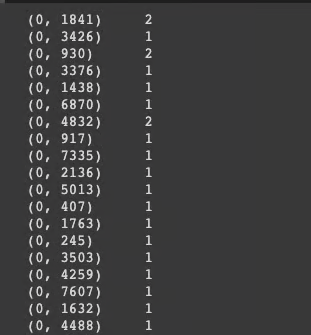

For example, in the image above, the word corresponding to 1841 is used twice in email number 0.

Now, our machine learning model will be able to predict spam emails based on the number of occurrences of certain words that are common in spam emails.

Building the model
SVM, the support vector machine algorithm, is a linear model for classification and regression. The idea of SVM is simple, the algorithm creates a line, or a hyperplane, which separates the data into classes. SVM can solve both linear and non-linear problems:

 Let’s create an SVM model with the code below:

In [33]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

model = svm.SVC() assigns svm.SVC() to the model. In the model.fit(features,y_train) function, model.fit trains the model with features and y_train. Then, it checks the prediction against the y_train label and adjusts its parameters until it reaches the highest possible accuracy.

Testing our email spam detector
Now, to ensure accuracy, let’s test our application. Run the code below:

In [34]:
features_test = cv.transform(z_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.9829596412556054


The features_test = cv.transform(z_test) function makes predictions from z_test that will go through count vectorization. It saves the results to the features_test file.

In the print(model.score(features_test,y_test)) function, mode.score() scores the prediction of features_test against the actual labels in y_test.



In the image above, you’ll see that we were able to classify spam with 98 percent accuracy.

we learned how to o build and run our model, comparing our predictions against the actual output. Finally, we tested our model using count vectorization.

We’ve only scratched the surface of what we can achieve with machine learning for our email spam detector. We can also add modifications like automating the CSV file or providing a voice assistant.